# 주가 충격 시 대기오염으로 인한 투자자의 행태 변화

<ul>
    <li> Reasearch Aim <br>
        대기 오염이 주가 폭락에 영향을 미칠 것 인가?
        - 날씨가 투자자 mood에 영향을 준다는 선행연구들이 존재
        - 투자자 mood 가 좋지 않을 때, 주가 폭락이 있을 경우 더 큰 악영향을 줄 것
        - 대기 오염이 높을 수록, 주가 폭락 시 더 악영향이 있지 않을까?

### - Literature Review

<ol>
<b><li>한국 주식시장에서의 날씨효과: 시장상황, 수익률과 거래활동의 일중패턴 (최기호, 윤성민 2018)</li></b>
    KOSPI 시장에서 날씨효과가 존재하는지를 분석하였으며, 불확실성이 높고 위험한 상황에서 날씨로 인한 기분과 심리의 영향이 투자자들에게 더 큰 영향을 주는 것으로 드러남 <br>
    
<b><li>How does air pollution affect the stock market performance? Evidence from China (Zizhao et al. 2023)</li></b>
    중국의 A주 상장 기업 1,344개사(2013-2019년)의 패널 데이터를 선택하여 고정 효과 모형을 사용하여 결과를 추정함으로써 대기 오염과 주식 시장 성능 간의 관계를 탐구 <br>
    분석 결과, 대기 오염은 투자자의 감정을 저하시켜 주식 시장 성능에 영향을 미치며, 이는 투자자의 판단력과 인지 능력에 영향을 미치고 비합리적인 주식 투자 결정을 유발할 수 있음<br>
    
<b><li>Ambient particulate air pollution and daily stock market returns and volatility in 47 cities worldwide (Simo-Pekka Kiihamäki et al. 2021)</li></b>
    대기 오염이 주식 시장 수익률과 변동성에 미치는 영향을 전 세계적으로 분석하였고, 분석 결과, PM 2.5의 농도가 증가할 수록 주식 시장 수익률이 감소하고, 변동성이 증가함 <br>
    
<b><li>The Behaviors of The Korean Stock Markets Following Large Price Changes:<br>
    An Empirical Study on the Behavioral Finance Hypothesis (지광훈, 정종락 2007)</li></b>
    주가 급등락의 충격 이후 나타나는 주가의 이상반응 현상을 한국의 주식시장을 대상으로 실증적으로 검증하였다. <br>
    투자자의 사전적 인식이 주가 급등락과 함께 고려되는 경우, 상승 추세에서의 주가 급등경우와 하락 추세의 주가 급등 경우에는 양의 초과수익을 발생 <br>
    주가 급등락의 크기와 이후 이상 반응 정도와의 관계는 대체로 정의 상관 관계를 보임 <br>
    
<b><li>대기오염물질과 주가 수익률 및 변동성 (김태경, 유시용 2020)</li></b>
    대기오염물질로 인한 투자심리의 변화가 국내 코스피지수 수익률 및 변동성에 미치는 직접적인 영향, 미세먼지와 초미세먼지가 지수변동성에 음의 영향 <br>
    지수수익률과 지수변동성 모두 장기간 대기오염에 노출되면 음의 영향이 더 확연히 나타남 <br>
</ol>

### - Our Reasearch

<ol>
    선행 연구들에서는 국내 코스피 지수나 주식 시장 자체 등 Market 기준으로 보았고 본 연구에서는 Firm 단위에서 분석을 진행해 보고자 함 <br>
    투자자 mood 와 관련 있는 것은 음의 가격 충격이 있을 경우 어떠한 행태가 나타나는지에 집중을 해 보고자 함 <br>
    가격 충격이라는 사건(event) 를 제안 후, 코스피 기업들을 대상으로 분석을 진행해 보고자 함

### - Data

<oi>
    1. 대기오염 데이터 -> 서울시 공공데이터 포털 이용
    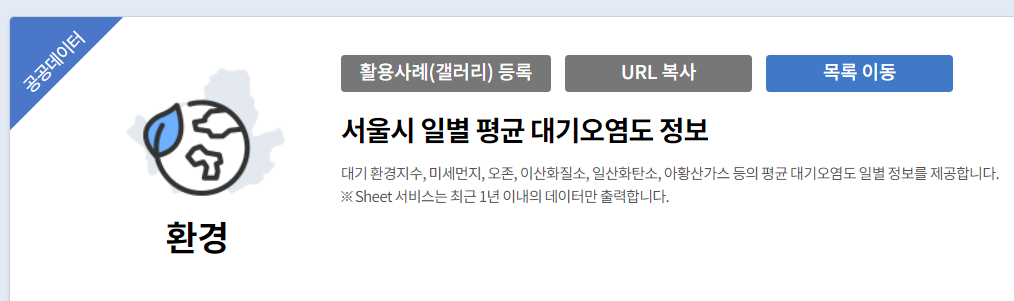
    출처 : 서울시 공공데이터 포털 https://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do

<io>
2. Kospi 지수 -> Naver Finance 공공 api 이용 xml형태를 변환이 쉽도록 Json 형태로 변환함 <br>
3. Kospi 기업 -> Fnguide 를 이용하여 전체 기업에 대해서 받아옴 <br><br>
데이터 기한 : 2013-2022
    2013년, WHO 산하 암 연구 기관인 IARC 에서 1급 발암 물질로 미세먼지 선정 <br>
    미세먼지의 노출은 호흡기 자극 및 질환의 증가, 폐 기능의 감소, 천식의 악화, 만성기관지염의 악화, 심박수의 악화, 심장질환, 심근경색, 폐암 등을 야기 <br>
    따라서 2013년 부터 2022년 까지를 분석 대상 기한으로 설정함<br>
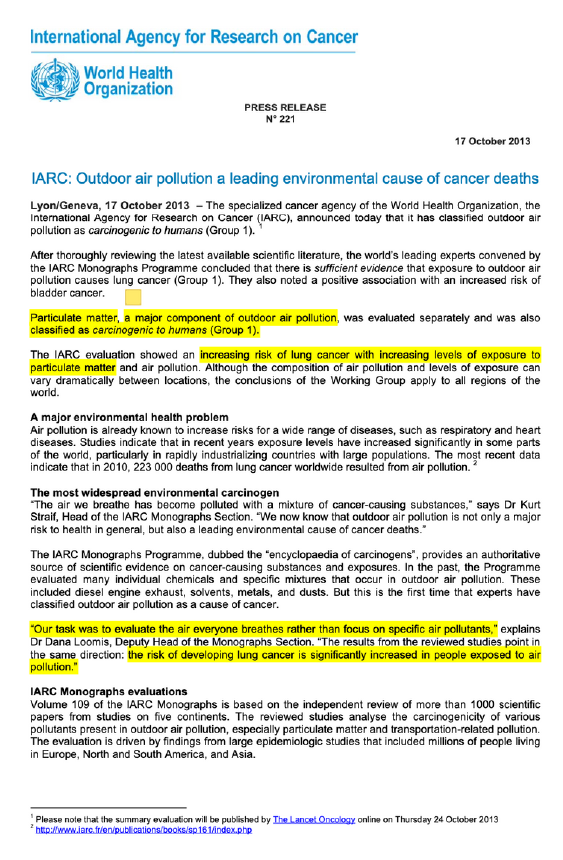

## 1. 필요한 데이터 등을 받아 옴

In [58]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

### 서울시공공데이터포털 통해서 서울시의 미세먼지 농도 등을 받아옴

In [2]:
import requests
import pandas as pd

# 시작과 끝 연도 설정
start_year = 2013
end_year = 2022
api_key = '6c4e44536f7369723131324664566452' #서울시 공공api를 통해 발급받은 key 값

# 날짜 범위 생성
date_range = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='1D').strftime("%Y%m%d")

# 데이터 수집 - 서울시 공공api 이용
all_data = []
for date in date_range:
    url = f'http://openAPI.seoul.go.kr:8088/{api_key}/json/DailyAverageAirQuality/1/40/{date}'
    try: #request가 잘 될때 기준
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        if 'DailyAverageAirQuality' in data: #미세먼지 관련 데이터가 있는 경우
            daily_data = pd.DataFrame(data['DailyAverageAirQuality']['row'])
            all_data.append(daily_data)
    except requests.RequestException as e: #오류 발생시 예외 처리하고 그 다음 반복문으로 진행 할 수 있도록
        print(f"{date} 데이터를 가져오는 중 에러 발생: {e}")

# DataFrame 생성 및 CSV로 저장
df = pd.concat(all_data).reset_index(drop=True)
df.to_csv('일별평균대기오염도.csv', encoding='cp949')


<oi>
    서울시 미세먼지 농도는 다음과 같이 각 측정소 별로, 날짜 별로 제공하며 <br>
    제공되는 미세먼지 농도는 이산화질소(NO2), 오존(O3), 일산화탄소(CO), 아황산가스(SO2), 미세먼지(PM10), 초미세먼지(PM2.5) 이다. <br>
    미세먼지 농도의 대용치를 위해선, 서울시 측정도들의 평균치가 필요하다.

In [4]:
df

,MSRDT_DE,MSRSTE_NM,NO2,O3,CO,SO2,PM10,PM25
0,20130101,강남구,0.050,0.007,0.5,0.006,38.0,0.0
1,20130101,강남대로,0.058,0.005,0.7,0.007,52.0,0.0
2,20130101,강동구,0.033,0.007,0.6,0.005,33.0,0.0
3,20130101,강변북로,0.047,0.008,0.6,0.005,40.0,0.0
4,20130101,강북구,0.038,0.011,0.5,0.005,27.0,0.0
...,...,...,...,...,...,...,...,...
144175,20221231,용산구,0.042,0.006,0.8,0.004,43.0,34.0
144176,20221231,은평구,0.033,0.011,0.8,0.004,37.0,25.0
144177,20221231,자연사박물관,0.041,0.011,0.8,0.004,39.0,28.0
144178,20221231,정릉로,0.051,0.004,1.0,0.004,47.0,38.0


In [130]:
df = pd.read_csv('일별평균대기오염도.csv', encoding='cp949')
df = df[['MSRDT_DE', 'NO2', 'O3', 'CO', 'SO2', 'PM10', 'PM25']] #문자 데이터인 측정도 명 'MSRSTE_NM' 을 제외하고 고름
#df.drop('MSRSTE_NM', axis=1) #이거 역시도 drop 하는 방식임
df = df.rename(columns={'MSRDT_DE': 'Date'}) #컬럼명을 Date로 바꾸어서 잘 이해되도록 함
mise = df.groupby('Date').mean() # 측정 날짜를 기준으로 평균을 구함
mise.to_csv('서울시평균대기오염도.csv', encoding = 'cp949')

### Naver Finance 를 통하여 XML 형태로 코스피 지수 데이터를 받아옴

In [60]:
import xmltodict
import numpy as np
#XML 형태로 코스피 지수를 받아옴
url = 'https://fchart.stock.naver.com/sise.nhn?symbol=KOSPI&timeframe=day&count=3000&requestType=0'
re = requests.get(url)
data = xmltodict.parse(re.text) #re.text 가 xml 형태이기에 json 형태로 변환을 해 줌
data['protocol']['chartdata']['item']
start_date = datetime(2012, 12, 28)
end_date = datetime(2022, 12, 31)

# 데이터 필터링
filtered_data = []
for item in data['protocol']['chartdata']['item']: #이 항복에 값이 들어 있음
    date, value = item['@data'].split('|')[0], item['@data'].split('|')[1] #나누어져 있는 형식 따라서 받음
    date = datetime.strptime(date, '%Y%m%d') #datetime 형식으로
    if start_date <= date <= end_date:
        filtered_data.append({'date': date, 'value': value})
        
KS = pd.DataFrame(filtered_data)
KS.columns = ['Date', '종가']
KS['종가'] = pd.to_numeric(KS['종가'])
KS['kospi'] = 100*np.log(KS['종가'] / KS['종가'].shift(1))
KS = KS.dropna()
KS.to_csv('코스피.csv', encoding='cp949', index=False)

### 금융 기업등을 제외한 코스피 속하는 전체 기업 데이터는 Fnguide 의 Dataguide를 활용하여 받아옴

In [227]:
diff = pd.read_excel('일별수익률,거래대금,거래량.xlsx', sheet_name = '일별수익률')
money = pd.read_excel('일별수익률,거래대금,거래량.xlsx', sheet_name = '일거래대금') #안씀
vol = pd.read_excel('일별수익률,거래대금,거래량.xlsx', sheet_name = '일거래량') #안씀
# KS 는 코스피 지수
# mise 는 미세먼지 지수로 이미 받아옴
#mise = pd.read_csv('서울시평균대기오염도.csv', encoding = 'cp949', index_col=0

In [230]:
# 수익률 데이터가 없는 경우 제외함
diff = diff.dropna(axis=1) # 각 열별로 데이터 없으면 drop
firmname = diff.columns #firmname이 해당되는 회사 명들
money = money[firmname]
vol = vol[firmname]
numdiff = len(firmname) -1 #첫 열이 회사가 아닌 Date라서
print('사용한 기업 수 : ', numdiff)

사용한 기업 수 :  622


## 2. 데이터 전처리, AR, AP(5) - 장기 대기오염 누출 (허나, 계절성이 존재하는 미세먼지 고려 안함.. 추후 수정)

<oi> 
    AR 계산을 위해서 Kospi와 병합하여 250일치 회귀하여 AR 계산

In [215]:
#AR -10% 분류 위해서 AR들을 만들어보자
from statsmodels.regression.rolling import RollingOLS
ddf = pd.merge(diff, KS, on='Date', how='left') #기업 일 수익률과 코스피 까지 옆으로 병합해봄
beta_values = []
alpha_values = []

for n in range(1, numdiff): #첫열이 date라서... for문상 맨 처음 열을 제외하고 끝나는 건 그 다음부터니 +1된 전체 값 고려 필요
    df1 = pd.DataFrame(index=ddf.index)
    df1['target'] = ddf[ddf.columns[n]]
    df1['KS'] = ddf['kospi']
    roll_reg2 = RollingOLS.from_formula('KS ~ target', window=251,min_nobs=251, data=df1,missing='drop') #target 하고 Kospi 지수하고 250일치 reg만 봄
    model3 = roll_reg2.fit()
    para2 = model3.params
    beta_values.append(para2['target'])
    alpha_values.append(para2['Intercept'])

beta = pd.DataFrame(beta_values, index=column_names).T
alpha = pd.DataFrame(alpha_values, index=column_names).T

alpha['Date'] = ddf['Date'] #Date를 index 로 하기 위해서 먼저 alpha에 결합
alpha.set_index('Date', inplace=True) #그걸 index로 하는데 inplace를 통하여 Date를 없애고 index로 함
alpha.to_csv('alpha.csv', index=True, encoding='cp949')

beta['Date'] = ddf['Date'] #Date를 index 로 하기 위해서 먼저 beta에 결합
beta.set_index('Date', inplace=True) #그걸 index로 하는데 inplace를 통하여 Date를 없애고 index로 함
beta.to_csv('beta.csv', index=True, encoding='cp949')

<oi>
    5일간의 평균 (장기간 대기오염 노출 추정)
     $$\text{mean5AP}_{j,t} = \frac{1}{5} \sum_{p=1}^{5} AP_{j,t-p+1}$$ <br>

In [222]:
mmise = mise.copy()
for i in range(0, len(mmise.columns)):
    mmise[mmise.columns[i]+'(AP5)'] = mmise[mmise.columns[i]].rolling(window=5, min_periods = 5).mean() #5일간의 평균(장기 누적체감)

A_values = []
B_values = []
ddf.set_index('Date', inplace=True) #index 맞출 겸 set 해줌
for n in range(0, len(beta.columns)):
    col_name = diff.columns[n+1] #diff에는 Date 가 포함되어 있어어 그 다음부터 해야됨
    A_col = alpha.iloc[:, n] + beta.iloc[:, n] * ddf['kospi']
    B_col = ddf.loc[:, col_name] - A_col

    A_values.append(A_col)
    B_values.append(B_col)

A = pd.concat(A_values, axis=1)
B = pd.concat(B_values, axis=1)
A.columns = beta.columns
B.columns = beta.columns

# CSV 파일로 저장
B.to_csv('AR.csv', index=True, encoding='cp949')

mmise.index = pd.to_datetime(mmise.index, format='%Y%m%d') #mmise가 확인해보니 20130101 과 같은 형태여서 2013-01-01과 같은 datetime으로 바꾸어줌

# ddf와 mmise를 병합하여 CSV 파일로 저장
dddf = pd.merge(ddf, mmise, on='Date', how='left')
dddf.to_csv('mise_merge.csv', index=True, encoding='cp949')

### 주가 하락상황만을 볼 것이기에, ddf 데이터프레임 기준 주가가 10% 이하인 경우의 m,n 만 추출하고
### 마찬가지로 AR 이 10%하락인 경우를 봐서, 각각 proxy a, b라는 csv 형태로 전처리함

In [238]:
#SR<-10 : proxy A, AR<-10 : proxy B
ddf = pd.read_csv('mise_merge.csv', encoding='cp949', index_col=0)
AR = pd.read_csv('AR.csv', encoding='cp949', index_col=0)
alpha = pd.read_csv('alpha.csv', encoding='cp949', index_col=0)
beta = pd.read_csv('beta.csv', encoding='cp949', index_col=0)

A = pd.DataFrame()
B = pd.DataFrame()

locate_ks = ddf.columns.get_loc('kospi')

k=0
for n in range(0, numdiff): 
    for m in range(250,len(ddf)-20):
        if(ddf.iloc[m,n]<=-10):
            if(pd.isnull(diff.iloc[m-250:m+21, n]).sum()==0):
                A.loc[k, "name"] = ddf.columns[n]
                A.loc[k, "date"] = ddf.index[m]
                A.loc[k, "diff"] = ddf.iloc[m,n]
                A.loc[k, "alpha"] = alpha.iloc[m,n]
                A.loc[k, "beta"] = beta.iloc[m,n]
                A.loc[k, 'KS'] = ddf.iloc[m, locate_ks]
                for i in range(1, 13):
                    A.loc[k, ddf.columns[-i]] = ddf.loc[ddf.index[m], ddf.columns[-i]]
                a = alpha.iloc[m,n]
                b = beta.iloc[m,n]
                C = 1+(ddf.iloc[m:m+21, n] - (a + b*ddf.iloc[m:m+21, locate_ks]))/100
                C = C.reset_index(drop=True)
                A.loc[k, "Day1"] = C[1]-1
                A.loc[k, "Day2"] = C[2]-1
                ppp=1
                for pp in range(1, 6):
                    ppp = ppp*(C[pp])
                A.loc[k, "Day5"] = ppp-1
                ppp=1
                for pp in range(1, 21):
                    ppp = ppp*(C[pp])
                A.loc[k, "Day20"] = ppp-1
                k += 1
A = A.dropna() #미세먼지 데이터가 결측치인 날들이 있어서 제외함
A.to_csv('proxya.csv', index=False, encoding='cp949')

k=0
for n in range(0, numdiff):
    for m in range(250,len(ddf)-20):
        if(AR.iloc[m,n]<=-10):
            B.loc[k, "name"] = ddf.columns[n]
            B.loc[k, "date"] = ddf.index[m]
            B.loc[k, "diff"] = ddf.iloc[m,n]
            B.loc[k, "alpha"] = alpha.iloc[m,n]
            B.loc[k, "beta"] = beta.iloc[m,n]
            B.loc[k, 'KS'] = ddf.iloc[m, locate_ks]
            for i in range(1, 13):
                B.loc[k, ddf.columns[-i]] = ddf.loc[ddf.index[m], ddf.columns[-i]]
            a = alpha.iloc[m,n]
            b = beta.iloc[m,n]
            C = 1+(ddf.iloc[m:m+21, n] - (a + b*ddf.iloc[m:m+21, locate_ks]))/100
            C = C.reset_index(drop=True)
            B.loc[k, "Day1"] = C[1]-1
            B.loc[k, "Day2"] = C[2]-1
            ppp=1
            for pp in range(1, 6):
                ppp = ppp*(C[pp])
            B.loc[k, "Day5"] = ppp-1
            ppp=1
            for pp in range(1, 21):
                ppp = ppp*(C[pp])
            B.loc[k, "Day20"] = ppp-1
            k += 1

B = B.dropna() #미세먼지 데이터가 결측치인 날들이 있어서 제외함              
B.to_csv('proxyb.csv', index=False, encoding='cp949')

In [244]:
def star(a):
    if a < 0.01:
        z = '***'
    elif a >=0.01 and a < 0.05:
        z = '**'
    elif a >=0.05 and a < 0.1:
        z = '*'
    else:
        z = ' '
    return z

## 3. 분석 결과 (1) - 미세먼지가 주가 급락 시 어느정도 음의 영향을 끼쳤는가?

In [245]:
A = pd.read_csv('proxya.csv', encoding='cp949')
B = pd.read_csv('proxyb.csv', encoding='cp949')

import statsmodels.api as sm

AA = pd.DataFrame()
for i in range(5, 17):
    Y_name = ['diff']
    X_name = [A.columns[-i], 'KS']
    Y = A.loc[:, Y_name].values
    X = A.loc[:, X_name].values
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    AA.loc['constant',A.columns[-i]] = str(round(model.params[0],4))+star(model.pvalues[0])
    AA.loc['pollution',A.columns[-i]] = str(round(model.params[1],4))+star(model.pvalues[1])
    AA.loc['KS',A.columns[-i]] = str(round(model.params[2],4))+star(model.pvalues[2])
AA.to_csv('result_AA.csv', index=True)

BB = pd.DataFrame()
for i in range(5, 17):
    Y_name = ['diff']
    X_name = [B.columns[-i], 'KS']
    Y = B.loc[:, Y_name].values
    X = B.loc[:, X_name].values
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    BB.loc['constant',A.columns[-i]] = str(round(model.params[0],4))+star(model.pvalues[0])
    BB.loc['pollution',A.columns[-i]] = str(round(model.params[1],4))+star(model.pvalues[1])
    BB.loc['KS',A.columns[-i]] = str(round(model.params[2],4))+star(model.pvalues[2])
BB.to_csv('result_BB.csv', index=True)



<oi>
    주가 급락한 날의 수익률과, 각 미세먼지(pollution), 코스피 지수만으로 회귀를 하여서, 미세먼지가 음의 영향을 어느정도 끼쳤는지 보고자 함 <br>
    $$ \text(Diff)_{t} = \beta_{0} + \beta_{1}\text(Pollution)_{t} + \beta_{2}\text(KS)_{t} + \epsilon_{t} $$

In [246]:
AA

,NO2,O3,CO,SO2,PM10,PM25,NO2(AP5),O3(AP5),CO(AP5),SO2(AP5),PM10(AP5),PM25(AP5)
constant,-14.1437***,-13.7099***,-13.2868***,-14.1211***,-13.553***,-13.4871***,-14.0703***,-14.3508***,-12.9196***,-14.3744***,-13.7751***,-13.6253***
pollution,0.3948,-17.9385***,-1.6181***,-2.3062,-0.0133***,-0.0283***,-1.9564,9.0808,-2.3518***,57.1009,-0.0085**,-0.0228***
KS,-0.004,-0.0265,0.0167,-0.0029,-0.0031,0.0139,-0.0019,-0.0013,0.0039,-0.0106,-0.0011,0.0015


<oi>
    주가가 10% 이상 하락한 경우 O3, CO ,PM10, PM25 등이 장기 노출 영향의 경우는 CO, PM10, PM25 등이 영향을 주는 것으로 보임 <br>

In [248]:
BB

,NO2,O3,CO,SO2,PM10,PM25,NO2(AP5),O3(AP5),CO(AP5),SO2(AP5),PM10(AP5),PM25(AP5)
constant,-14.1002***,-13.7147***,-13.279***,-14.1159***,-13.5565***,-13.4875***,-14.0628***,-14.3404***,-12.9146***,-14.3735***,-13.7395***,-13.5904***
pollution,-0.5236,-17.1819***,-1.6064***,-0.2654,-0.0129***,-0.0277***,-1.7505,9.2328,-2.3339***,60.1693,-0.009***,-0.0237***
KS,0.1479***,0.123***,0.1665***,0.1469***,0.145***,0.162***,0.1481***,0.149***,0.1541***,0.1394***,0.1495***,0.1523***


<oi>
    이상수익률이 10% 이상 하락한 경우 O3, CO ,PM10, PM25 등이 장기 노출 영향의 경우는 CO, PM10, PM25 등이 영향을 주는 것으로 보임 <br>

## 4. 분석 결과 (2) - 음의 영향 있을 경우 음의 영향 더 큰 경우 추정

<oi>
    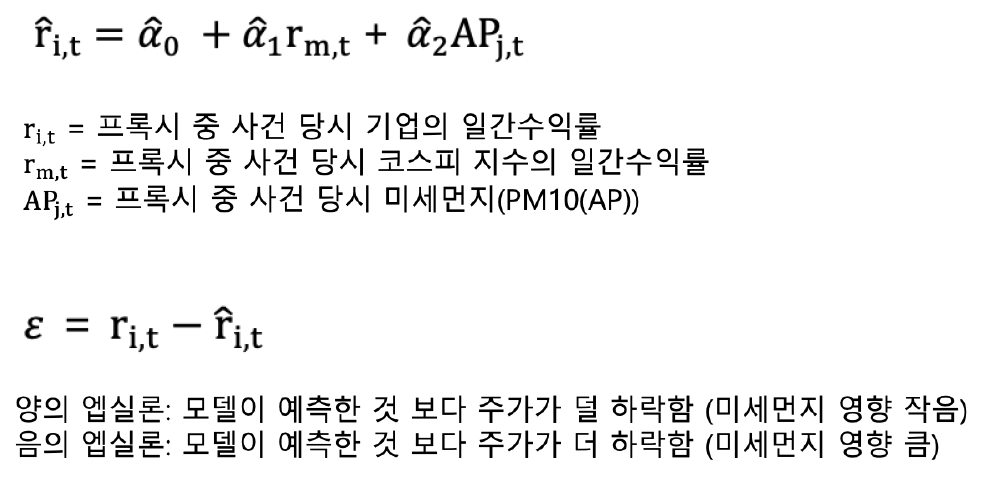

# - Eventstudy

<oi>
    음의 영향을 준 것으로 보이는 유의한 미세먼지 값들에 대해서, 단일 변수로써 추정을 진행해봄 <br>
    예측 시, 각 미세먼지 농도로 추정한epsilon이 양인 경우와 음인 경우가 미세먼지에 영향 정도를 비교 가능할 것으로 추정하여 <br>
    eventstudy를 진행해봄 <br>

In [264]:
AP = ['O3', 'CO', 'PM10', 'PM25', 'CO(AP5)', 'PM10(AP5)', 'PM25(AP5)']
for ap in range(0, len(AP)):
    Y_name = ['diff']
    X_name = [AP[ap], 'KS']
    Y = A.loc[:, Y_name].values
    X = A.loc[:, X_name].values
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    a_con = model.params[0]
    a_beta = model.params[1]
    a_ks = model.params[2]

    Y_name = ['diff']
    X_name = [AP[ap], 'KS']
    Y = B.loc[:, Y_name].values
    X = B.loc[:, X_name].values
    model = sm.OLS(Y, sm.add_constant(X)).fit()

    b_con = model.params[0]
    b_beta = model.params[1]
    b_ks = model.params[2]


    A['epslion_'+AP[ap]] = A['diff'] - (a_con + a_beta*A[AP[ap]] + a_ks*A['KS'])
    B['epslion_'+AP[ap]] = B['diff'] - (b_con + b_beta*B[AP[ap]] + b_ks*B['KS'])

    #미세먼지로 인해 주가가 더 하락한 경우 : 큰 음의 엡실론
    q=['1', '2', '5', '20']

    UP_A = A[A['epslion_'+AP[ap]]>0].reset_index(drop=True)
    DOWN_A = A[A['epslion_'+AP[ap]]<0].reset_index(drop=True)
    result = pd.DataFrame()
    result['SR<-10%('+str(len(A))+')']=0
    result['SR<-10%(e>0)('+str(len(UP_A))+')']=0
    result['SR<-10%(e<0)('+str(len(DOWN_A))+')']=0

    UP_B = B[B['epslion_'+AP[ap]]>0].reset_index(drop=True)
    DOWN_B = B[B['epslion_'+AP[ap]]<0].reset_index(drop=True)
    result['AR<-10%('+str(len(B))+')']=0
    result['AR<-10%(e>0)('+str(len(UP_B))+')']=0
    result['AR<-10%(e<0)('+str(len(DOWN_B))+')']=0

    import scipy.stats as stats
    for i in range(0, 4):
        result.loc["Day"+q[i]]=[star(stats.ttest_1samp(a=A['Day'+q[i]], popmean=0).pvalue)+str(round(100*A['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=A['Day'+q[i]], popmean=0).pvalue,2))+'%)',
                            star(stats.ttest_1samp(a=UP_A['Day'+q[i]], popmean=0).pvalue)+str(round(100*UP_A['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=UP_A['Day'+q[i]], popmean=0).pvalue,2))+'%)',
                            star(stats.ttest_1samp(a=DOWN_A['Day'+q[i]], popmean=0).pvalue)+str(round(100*DOWN_A['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=DOWN_A['Day'+q[i]], popmean=0).pvalue,2))+'%)',
                            star(stats.ttest_1samp(a=B['Day'+q[i]], popmean=0).pvalue)+str(round(100*B['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=B['Day'+q[i]], popmean=0).pvalue,2))+'%)',
                            star(stats.ttest_1samp(a=UP_B['Day'+q[i]], popmean=0).pvalue)+str(round(100*UP_B['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=UP_B['Day'+q[i]], popmean=0).pvalue,2))+'%)',
                            star(stats.ttest_1samp(a=DOWN_B['Day'+q[i]], popmean=0).pvalue)+str(round(100*DOWN_B['Day'+q[i]].mean(),2))+'('+str(round(100*stats.ttest_1samp(a=DOWN_B['Day'+q[i]], popmean=0).pvalue,2))+'%)']
    print(AP[ap], '의 Event study 결과 표')
    print(result)
    result.to_csv('result_'+AP[ap]+'.csv')

O3 의 Event study 결과 표
         SR<-10%(4808) SR<-10%(e>0)(2998) SR<-10%(e<0)(1810)   AR<-10%(4667)  \
Day1     ***0.65(0.0%)     ***0.47(0.02%)      ***0.95(0.0%)   ***0.64(0.0%)   
Day2   ***-0.25(0.69%)       0.08(49.11%)     ***-0.79(0.0%)  **-0.23(1.46%)   
Day5     ***2.52(0.0%)      ***1.95(0.0%)      ***3.47(0.0%)    ***2.6(0.0%)   
Day20    ***7.79(0.0%)      ***6.18(0.0%)     ***10.45(0.0%)   ***7.34(0.0%)   

      AR<-10%(e>0)(2909) AR<-10%(e<0)(1758)  
Day1       ***0.5(0.01%)     ***0.88(0.01%)  
Day2         0.1(37.23%)     ***-0.77(0.0%)  
Day5       ***2.12(0.0%)      ***3.39(0.0%)  
Day20      ***5.92(0.0%)       ***9.7(0.0%)  
CO 의 Event study 결과 표
         SR<-10%(4808) SR<-10%(e>0)(2995) SR<-10%(e<0)(1813)   AR<-10%(4667)  \
Day1     ***0.65(0.0%)     ***0.38(0.27%)      ***1.09(0.0%)   ***0.64(0.0%)   
Day2   ***-0.25(0.69%)        0.1(36.64%)     ***-0.82(0.0%)  **-0.23(1.46%)   
Day5     ***2.52(0.0%)      ***1.75(0.0%)      ***3.79(0.0%)    ***2.6(0.0%)   
Day20

## 마크다운 형태로 표를 조금 더 깔끔하게 정리한 결과

<center><b>1. O3 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2998) | SR<-10%(e<0)(1810) | AR<-10%(4667)  | AR<-10%(e>0)(2909) | AR<-10%(e<0)(1758)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.47(0.02%)     | ***0.95(0.0%)      | ***0.64(0.0%)  | ***0.5(0.01%)      | ***0.88(0.01%)      |
| Day2  | ***-0.25(0.69%) |  0.08(49.11%)      | ***-0.79(0.0%)     | **-0.23(1.46%) |  0.1(37.23%)       | ***-0.77(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.95(0.0%)      | ***3.47(0.0%)      | ***2.6(0.0%)   | ***2.12(0.0%)      | ***3.39(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***6.18(0.0%)      |<b> ***10.45(0.0%)</b>     | ***7.34(0.0%)  | ***5.92(0.0%)      | <b>***9.7(0.0%)  </b>      |

<center><b>2. CO 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2995) | SR<-10%(e<0)(1813) | AR<-10%(4667)  | AR<-10%(e>0)(2904) | AR<-10%(e<0)(1763)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.38(0.27%)     | ***1.09(0.0%)      | ***0.64(0.0%)  | ***0.38(0.32%)     | ***1.07(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.1(36.64%)       | ***-0.82(0.0%)     | **-0.23(1.46%) |  0.13(24.79%)      | ***-0.82(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.75(0.0%)      | ***3.79(0.0%)      | ***2.6(0.0%)   | ***1.85(0.0%)      | ***3.84(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***5.95(0.0%)      | <b>***10.82(0.0%) </b>    | ***7.34(0.0%)  | ***5.4(0.0%)       | <b>***10.54(0.0%) </b>     |

<center><b>3. CO(AP5) 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2988) | SR<-10%(e<0)(1820) | AR<-10%(4667)  | AR<-10%(e>0)(2905) | AR<-10%(e<0)(1762)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.37(0.37%)     | ***1.12(0.0%)      | ***0.64(0.0%)  | ***0.42(0.14%)     | ***1.02(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.09(42.13%)      | ***-0.8(0.0%)      | **-0.23(1.46%) |  0.09(39.44%)      | ***-0.76(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.7(0.0%)       | ***3.87(0.0%)      | ***2.6(0.0%)   | ***1.84(0.0%)      | ***3.85(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***5.89(0.0%)      |<b> ***10.91(0.0%) </b>    | ***7.34(0.0%)  | ***5.4(0.0%)       | <b> ***10.55(0.0%)  </b>    |


<center><b>4. PM10 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2991) | SR<-10%(e<0)(1817) | AR<-10%(4667)  | AR<-10%(e>0)(2914) | AR<-10%(e<0)(1753)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.43(0.08%)     | ***1.02(0.0%)      | ***0.64(0.0%)  | ***0.46(0.05%)     | ***0.95(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.11(33.79%)      | ***-0.83(0.0%)     | **-0.23(1.46%) |  0.09(44.2%)       | ***-0.75(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.83(0.0%)      | ***3.66(0.0%)      | ***2.6(0.0%)   | ***1.95(0.0%)      | ***3.69(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***6.12(0.0%)      |<b> ***10.53(0.0%) </b>    | ***7.34(0.0%)  | ***5.72(0.0%)      | <b>***10.03(0.0%) </b>     |



<center><b>5. PM10(AP5) 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2996) | SR<-10%(e<0)(1812) | AR<-10%(4667)  | AR<-10%(e>0)(2913) | AR<-10%(e<0)(1754)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.4(0.18%)      | ***1.07(0.0%)      | ***0.64(0.0%)  | ***0.42(0.11%)     | ***1.01(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.11(30.1%)       | ***-0.85(0.0%)     | **-0.23(1.46%) |  0.11(31.33%)      | ***-0.8(0.0%)       |
| Day5  | ***2.52(0.0%)   | ***1.8(0.0%)       | ***3.73(0.0%)      | ***2.6(0.0%)   | ***1.98(0.0%)      | ***3.63(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***6.0(0.0%)       | <b> ***10.75(0.0%) </b>    | ***7.34(0.0%)  | ***5.62(0.0%)      |<b> ***10.21(0.0%)</b>      |



<center><b>6. PM25 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2992) | SR<-10%(e<0)(1816) | AR<-10%(4667)  | AR<-10%(e>0)(2911) | AR<-10%(e<0)(1756)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.4(0.17%)      | ***1.07(0.0%)      | ***0.64(0.0%)  | ***0.41(0.16%)     | ***1.03(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.13(23.55%)      | ***-0.87(0.0%)     | **-0.23(1.46%) |  0.13(23.18%)      | ***-0.83(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.78(0.0%)      | ***3.75(0.0%)      | ***2.6(0.0%)   | ***1.9(0.0%)       | ***3.77(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***6.02(0.0%)      |<b> ***10.69(0.0%) </b>    | ***7.34(0.0%)  | ***5.59(0.0%)      | <b> ***10.24(0.0%) </b>     |


<center><b>7. PM25(AP5) 의 Event study 결과 표</b></center>

<br>

|       | SR<-10%(4808)   | SR<-10%(e>0)(2989) | SR<-10%(e<0)(1819) | AR<-10%(4667)  | AR<-10%(e>0)(2900) | AR<-10%(e<0)(1767)  |
|-------|-----------------|--------------------|--------------------|----------------|--------------------|---------------------|
| Day1  | ***0.65(0.0%)   | ***0.4(0.15%)      | ***1.06(0.0%)      | ***0.64(0.0%)  | ***0.43(0.08%)     | ***0.99(0.0%)       |
| Day2  | ***-0.25(0.69%) |  0.1(37.77%)       | ***-0.82(0.0%)     | **-0.23(1.46%) |  0.11(31.3%)       | ***-0.79(0.0%)      |
| Day5  | ***2.52(0.0%)   | ***1.76(0.0%)      | ***3.77(0.0%)      | ***2.6(0.0%)   | ***1.94(0.0%)      | ***3.69(0.0%)       |
| Day20 | ***7.79(0.0%)   | ***5.96(0.0%)      |<b> ***10.79(0.0%) </b>    | ***7.34(0.0%)  | ***5.52(0.0%)      | <b>***10.33(0.0%) </b>     |



## 분석 결과 (3) - 엡실론이 음수인 경우를 머신러닝 classifier로 찾을 수가 있을까?

<oi>
미세먼지를 포함하여 추정한 경우 엡실론이 음수인 경우 더욱 큰 양의 누적이상수익률을 보였다. <br>
따라서, 엡실론 추정 당시 사용한 PM10(AP), KS를 기반으로 미세먼지로 인한 영향이 클 사건을 추정이 가능한지에 대해서 <br>
이를 머신러닝으로 classifier 를 기반으로 해 보고자 한다. 엡실론이 음수인 경우를 찾고자 하는 find 1이라 명명 하여 <br>
넣는 변수는 주가 충격 당시의 수익률, 영향을 준 미세먼지들, 코스피 등 이다.<br>
Proxy A, B 전부 존재하지만, 일일 수익률이 10% 하락한 경우(Proxy A)에 대해서만 epsilon이 음수인 경우를 찾아 보고자 한다.

In [269]:
import numpy as np
AP = ['O3', 'CO', 'PM10', 'PM25', 'CO(AP5)', 'PM10(AP5)', 'PM25(AP5)']
for ap in range(0,len(AP)):
    print(AP[ap], '로 예측')
    print()
    A['find_' + AP[ap]] = np.where(A['epslion_' + AP[ap]] < 0, 1, 0)


    from sklearn.model_selection import train_test_split
    #split
    X = A[['diff', 'KS', AP[ap]]]
    y = A['find_' + AP[ap]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    from sklearn.preprocessing import StandardScaler
    #스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    from sklearn.ensemble import RandomForestClassifier
    #랜덤포레스트로 학습
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train_scaled, y_train)

    #예측
    from sklearn.metrics import accuracy_score, classification_report
    y_pred_rf = rf.predict(X_test_scaled)
    print(f"랜덤포레스트: {accuracy_score(y_test, y_pred_rf)}")
    ac_rf = accuracy_score(y_test, y_pred_rf)
    print(classification_report(y_test, y_pred_rf))
    re1 = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
    re1.to_csv("랜덤포레스트_"+AP[ap]+".csv")

    #svm
    from sklearn.svm import SVC
    #모델 초기화
    svm_clf = SVC(kernel='linear', probability=True, random_state=1)
    svm_clf.fit(X_train_scaled, y_train)
    y_pred_svm = svm_clf.predict(X_test_scaled)

    print(f"SVM: {accuracy_score(y_test, y_pred_svm)}")
    ac_svm = accuracy_score(y_test, y_pred_svm)
    print(classification_report(y_test, y_pred_svm))
    re2 = pd.DataFrame(classification_report(y_test, y_pred_svm, output_dict=True)).transpose()
    re2.to_csv("SVM"+AP[ap]+".csv")

    #디시전트리 튜닝
    from sklearn.tree import DecisionTreeClassifier
    #모델 초기화
    dtc = DecisionTreeClassifier(random_state=0)
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)

    #예측
    print(f"디시전트리: {accuracy_score(y_test, y_pred_dtc)}")
    ac_dtc = accuracy_score(y_test, y_pred_dtc)
    print(classification_report(y_test, y_pred_dtc))
    re3 = pd.DataFrame(classification_report(y_test, y_pred_dtc, output_dict=True)).transpose()
    re3.to_csv("디시전트리"+AP[ap]+".csv")

O3 로 예측

랜덤포레스트: 0.9927234927234927
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       600
           1       0.99      0.99      0.99       362

    accuracy                           0.99       962
   macro avg       0.99      0.99      0.99       962
weighted avg       0.99      0.99      0.99       962

SVM: 0.9948024948024948
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       600
           1       1.00      0.99      0.99       362

    accuracy                           0.99       962
   macro avg       1.00      0.99      0.99       962
weighted avg       0.99      0.99      0.99       962

디시전트리: 0.9937629937629938
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       600
           1       0.99      1.00      0.99       362

    accuracy                           0.99       962
   macro avg       0.99      0.99      0.9

## 마크다운 형태로 표를 조금 더 깔끔하게 정리한 결과


<center><b>1. O3 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트</b>      |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.994991653 | 0.993333333 | 0.994161802 | 600      |
| 1            | 0.988980716 | 0.991712707 | 0.990344828 | 362      |
| accuracy     |             |             | 0.992723493 | 962      |
| macro avg    | 0.991986185 | 0.99252302  | 0.992253315 | 962      |
| weighted avg | 0.992729741 | 0.992723493 | 0.992725477 | 962      |
| <b> 디시전트리 </b>       |             |             |             |          |
| 0            | 0.998322148 | 0.991666667 | 0.994983278 | 600      |
| 1            | 0.986338798 | 0.997237569 | 0.991758242 | 362      |
| accuracy     |             |             | 0.993762994 | 962      |
| macro avg    | 0.992330473 | 0.994452118 | 0.99337076  | 962      |
| weighted avg | 0.993812821 | 0.993762994 | 0.993769699 | 962      |
| <b>SVM </b>         |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.991735537 | 1           | 0.995850622 | 600      |
| 1            | 1           | 0.986187845 | 0.993045897 | 362      |
| accuracy     |             |             | 0.994802495 | 962      |
| macro avg    | 0.995867769 | 0.993093923 | 0.99444826  | 962      |
| weighted avg | 0.994845449 | 0.994802495 | 0.994795206 | 962      |




<center><b>2. CO 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트 </b>     |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.998324958 | 0.994991653 | 0.996655518 | 599      |
| 1            | 0.991780822 | 0.997245179 | 0.994505495 | 363      |
| accuracy     |             |             | 0.995841996 | 962      |
| macro avg    | 0.99505289  | 0.996118416 | 0.995580506 | 962      |
| weighted avg | 0.995855601 | 0.995841996 | 0.995844231 | 962      |
| <b>디시전트리</b>        |             |             |             |          |
| 0            | 0.998330551 | 0.998330551 | 0.998330551 | 599      |
| 1            | 0.997245179 | 0.997245179 | 0.997245179 | 363      |
| accuracy     |             |             | 0.997920998 | 962      |
| macro avg    | 0.997787865 | 0.997787865 | 0.997787865 | 962      |
| weighted avg | 0.997920998 | 0.997920998 | 0.997920998 | 962      |
| <b>SVM </b>         |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.998330551 | 0.998330551 | 0.998330551 | 599      |
| 1            | 0.997245179 | 0.997245179 | 0.997245179 | 363      |
| accuracy     |             |             | 0.997920998 | 962      |
| macro avg    | 0.997787865 | 0.997787865 | 0.997787865 | 962      |
| weighted avg | 0.997920998 | 0.997920998 | 0.997920998 | 962      |




<center><b>3. CO(AP5) 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트</b>      |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.993322204 | 0.994983278 | 0.994152047 | 598      |
| 1            | 0.991735537 | 0.989010989 | 0.990371389 | 364      |
| accuracy     |             |             | 0.992723493 | 962      |
| macro avg    | 0.99252887  | 0.991997133 | 0.992261718 | 962      |
| weighted avg | 0.992721843 | 0.992723493 | 0.992721528 | 962      |
| <b>디시전트리 </b>       |             |             |             |          |
| 0            | 0.991666667 | 0.994983278 | 0.993322204 | 598      |
| 1            | 0.991712707 | 0.986263736 | 0.988980716 | 364      |
| accuracy     |             |             | 0.991683992 | 962      |
| macro avg    | 0.991689687 | 0.990623507 | 0.99115146  | 962      |
| weighted avg | 0.991684087 | 0.991683992 | 0.991679479 | 962      |
| <b>SVM </b>         |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 1           | 0.994983278 | 0.997485331 | 598      |
| 1            | 0.991825613 | 1           | 0.995896033 | 364      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.995912807 | 0.997491639 | 0.996690682 | 962      |
| weighted avg | 0.996906989 | 0.996881497 | 0.996883975 | 962      |





<center><b>4. PM10 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트 </b>     |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.998324958 | 0.996655518 | 0.99748954  | 598      |
| 1            | 0.994520548 | 0.997252747 | 0.995884774 | 364      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.996422753 | 0.996954133 | 0.996687157 | 962      |
| weighted avg | 0.996885452 | 0.996881497 | 0.996882331 | 962      |
| <b>디시전트리  </b>      |             |             |             |          |
| 0            | 0.993333333 | 0.996655518 | 0.994991653 | 598      |
| 1            | 0.994475138 | 0.989010989 | 0.991735537 | 364      |
| accuracy     |             |             | 0.993762994 | 962      |
| macro avg    | 0.993904236 | 0.992833254 | 0.993363595 | 962      |
| weighted avg | 0.993765368 | 0.993762994 | 0.993759609 | 962      |
| <b>SVM</b>          |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 1           | 0.994983278 | 0.997485331 | 598      |
| 1            | 0.991825613 | 1           | 0.995896033 | 364      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.995912807 | 0.997491639 | 0.996690682 | 962      |
| weighted avg | 0.996906989 | 0.996881497 | 0.996883975 | 962      |






<center><b>5. PM10(AP) 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트</b>      |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.995016611 | 1           | 0.997502082 | 599      |
| 1            | 1           | 0.991735537 | 0.995850622 | 363      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.997508306 | 0.995867769 | 0.996676352 | 962      |
| weighted avg | 0.996897038 | 0.996881497 | 0.996878922 | 962      |
| <b>디시전트리  </b>      |             |             |             |          |
| 0            | 0.996672213 | 1           | 0.998333333 | 599      |
| 1            | 1           | 0.994490358 | 0.997237569 | 363      |
| accuracy     |             |             | 0.997920998 | 962      |
| macro avg    | 0.998336106 | 0.997245179 | 0.997785451 | 962      |
| weighted avg | 0.997927916 | 0.997920998 | 0.997919859 | 962      |
| <b>SVM</b>          |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.995016611 | 1           | 0.997502082 | 599      |
| 1            | 1           | 0.991735537 | 0.995850622 | 363      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.997508306 | 0.995867769 | 0.996676352 | 962      |
| weighted avg | 0.996897038 | 0.996881497 | 0.996878922 | 962      |







<center><b>6. PM25 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트</b>      |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.993344426 | 0.996661102 | 0.995       | 599      |
| 1            | 0.994459834 | 0.988980716 | 0.991712707 | 363      |
| accuracy     |             |             | 0.993762994 | 962      |
| macro avg    | 0.99390213  | 0.992820909 | 0.993356354 | 962      |
| weighted avg | 0.993765313 | 0.993762994 | 0.993759577 | 962      |
| <b>디시전트리  </b>      |             |             |             |          |
| 0            | 0.994991653 | 0.994991653 | 0.994991653 | 599      |
| 1            | 0.991735537 | 0.991735537 | 0.991735537 | 363      |
| accuracy     |             |             | 0.993762994 | 962      |
| macro avg    | 0.993363595 | 0.993363595 | 0.993363595 | 962      |
| weighted avg | 0.993762994 | 0.993762994 | 0.993762994 | 962      |
| <b>SVM</b>          |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.993311037 | 0.991652755 | 0.992481203 | 599      |
| 1            | 0.986263736 | 0.988980716 | 0.987620358 | 363      |
| accuracy     |             |             | 0.990644491 | 962      |
| macro avg    | 0.989787387 | 0.990316735 | 0.99005078  | 962      |
| weighted avg | 0.990651816 | 0.990644491 | 0.990647017 | 962      |








<center><b>7. PM25(AP) 로 머신러닝 예측 결과 (단일)</b></center>

<br>

|              |             |             |             |          |
|--------------|-------------|-------------|-------------|----------|
| <b>랜덤 포레스트</b>      |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 1           | 0.993311037 | 0.996644295 | 598      |
| 1            | 0.989130435 | 1           | 0.994535519 | 364      |
| accuracy     |             |             | 0.995841996 | 962      |
| macro avg    | 0.994565217 | 0.996655518 | 0.995589907 | 962      |
| weighted avg | 0.995887192 | 0.995841996 | 0.99584638  | 962      |
| <b>디시전트리  </b>      |             |             |             |          |
| 0            | 1           | 1           | 1           | 598      |
| 1            | 1           | 1           | 1           | 364      |
| accuracy     |             |             | 1           | 962      |
| macro avg    | 1           | 1           | 1           | 962      |
| weighted avg | 1           | 1           | 1           | 962      |
| <b>SVM</b>          |             |             |             |          |
|              | precision   | recall      | f1-score    | support  |
| 0            | 0.998324958 | 0.996655518 | 0.99748954  | 598      |
| 1            | 0.994520548 | 0.997252747 | 0.995884774 | 364      |
| accuracy     |             |             | 0.996881497 | 962      |
| macro avg    | 0.996422753 | 0.996954133 | 0.996687157 | 962      |
| weighted avg | 0.996885452 | 0.996881497 | 0.996882331 | 962      |








## 분석 결과 (4) - 다중 미세먼지 농도 추가 분석

<oi>
    단일 미세먼지 농도를 기준으로, 수익률이 음의 충격을 받은 경우에 대해서 각각의 농도와 코스피 지수를 이용하여 예측을 해 본 결과 <br>
    대체로 매우 높은 정확도를 보였다. 허나 주가 충격에는 각각의 미세먼지 농도가 서로가 영향력이 높기에 비슷한 결과를 보일 수 있으나 <br>
    음의 충격을 받은 경우, 모든 미세먼지 농도와, 코스피 지수를 같이 넣어 feature_importance를 표현해 보고 <br>
    추가적으로 유의한 미세먼지 들만 넣었을 경우 어떠한 결과가 나타나는지 관찰 해 보고자 한다. <br>
    또한 주가 충격 당시 사전적으로 관찰 가능한 alpha, beta 값 역시 추가를 해 본다.

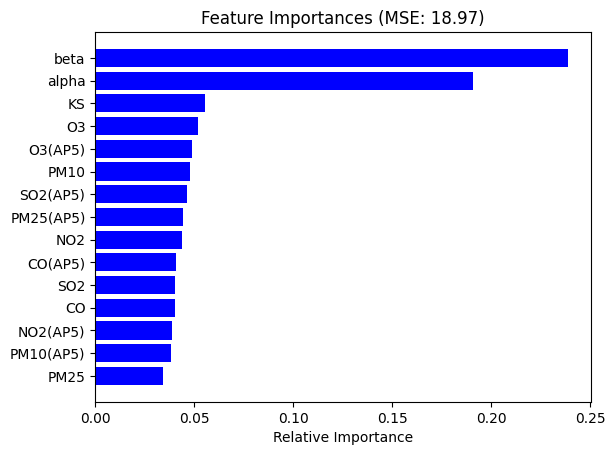

In [279]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')

Y = A['diff']
X = A[A.columns[3:18]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred = model.predict(X_test)

# 모델 성능 평가 (MSE 사용)
accuracy = mean_squared_error(Y_test, Y_pred)

# Feature Importance 추출
importances = model.feature_importances_

# Feature Importance를 시각화
features = X.columns
indices = np.argsort(importances)

plt.title(f'Feature Importances (MSE: {accuracy:.2f})')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<oi>
    주가 급락은 다른 지수 보다 beta, alpha 값의 영향을 많이 받는 것으로 보이며, 미세먼지 농도 자체는 그 날의 주가 급락에는 크게 영향이 없는 것 처럼 보인다.<br>
    만약 alpha와 beta 등이 없으면 어떠한 변화가 있을 것인가?

### alpha beta 가 없는 경우

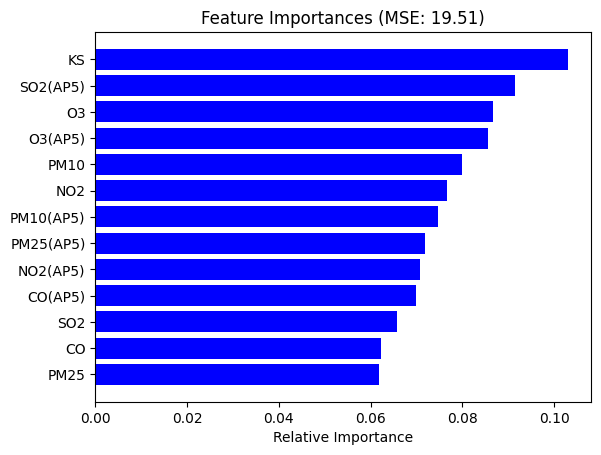

In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')

Y = A['diff']
X = A[A.columns[3:18]].drop(['alpha', 'beta'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred = model.predict(X_test)

# 모델 성능 평가 (MSE 사용)
accuracy = mean_squared_error(Y_test, Y_pred)

# Feature Importance 추출
importances = model.feature_importances_

# Feature Importance를 시각화
features = X.columns
indices = np.argsort(importances)

plt.title(f'Feature Importances (MSE: {accuracy:.2f})')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<oi>
    코스피 기업의 주가 급락은 결국 그날의 코스피 지수의 영향을 여전히 많이 받고 있는 것 처럼 보이며,<br>
    만일 이전 유의한 음의 값을 보인 미세먼지 농도와 코스피 지수로만 추정을 하게 되면 결과는 다음과 같다.

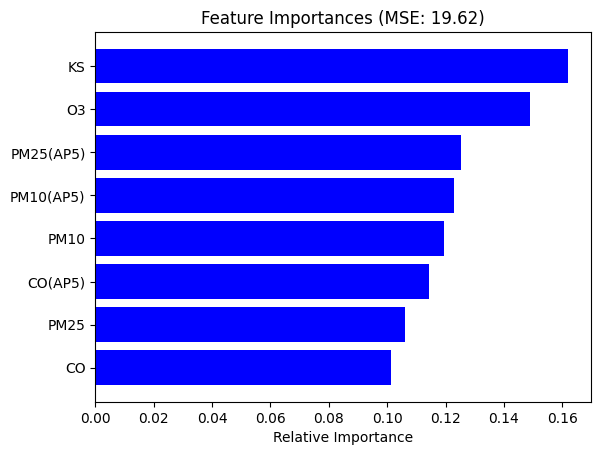

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')

Y = A['diff']
X = A[['KS', 'O3', 'CO', 'CO(AP5)', 'PM10', 'PM10(AP5)', 'PM25', 'PM25(AP5)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# 테스트 데이터에 대한 예측
Y_pred = model.predict(X_test)

# 모델 성능 평가 (MSE 사용)
accuracy = mean_squared_error(Y_test, Y_pred)

# Feature Importance 추출
importances = model.feature_importances_

# Feature Importance를 시각화
features = X.columns
indices = np.argsort(importances)

plt.title(f'Feature Importances (MSE: {accuracy:.2f})')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<oi>
    코스피 기업의 주가 급락은 결국 그날의 코스피 지수의 영향을 여전히 많이 받고 있는 것 처럼 보이며,<br>
    MSE 역시 이전보다는 약간 높은 것으로 나타났다. 이는 투자자들이 주가급락 사건 당일 경우는 코스피 지수를 가장 크게 고려해야된다는 것을 의미한다.<br>
    이전의 epsilon에 관한 분석에서 epsilon이 음수인 경우, 즉 예상보다 더 주가가 떨어졌을 경우로 예상되는 경우에 대해 더 큰 양의 이상수익률을 보인다는 점에 착안하여 <br>
    Day20의 값을 기준으로 크기 순으로 중앙값을 기준으로 나누어서 분석을 진행한 결과는 다음과 같다.

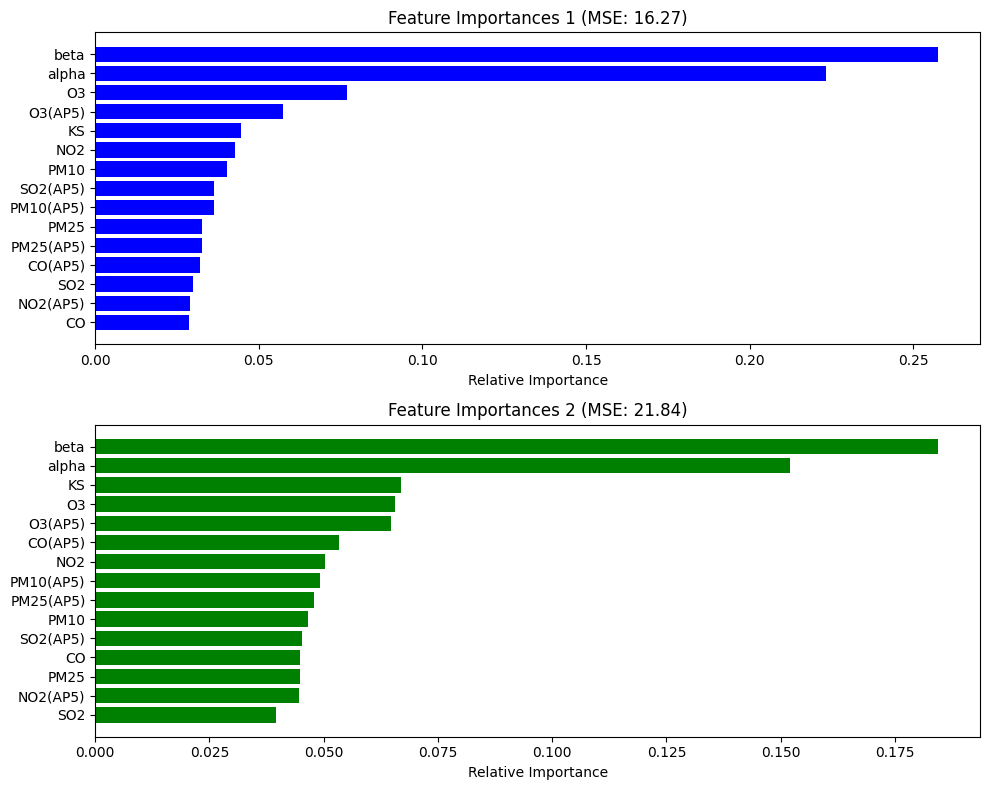

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')
dd = A['Day20'].median()
A1 = A[A['Day20']>=dd] #중앙값 보다 큰 경우 -> 미세먼지 영향 크지 않았을까?
A2 = A[A['Day20']<dd] #중앙값 보다 낮은 경우

#중앙값 보다 높은 경우
Y1 = A1['diff']
X1 = A1[A1.columns[3:18]]

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, Y_train1)

# 테스트 데이터에 대한 예측
Y_pred1 = model1.predict(X_test1)

# 모델 성능 평가 (MSE 사용)
accuracy1 = mean_squared_error(Y_test1, Y_pred1)

# Feature Importance 추출
importances1 = model1.feature_importances_

# Feature Importance를 시각화
features1 = X1.columns
indices1 = np.argsort(importances1)

#중앙값 보다 낮은 경우
Y2 = A2['diff']
X2 = A2[A2.columns[3:18]]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, Y_train2)

# 테스트 데이터에 대한 예측
Y_pred2 = model2.predict(X_test2)

# 모델 성능 평가 (MSE 사용)
accuracy2 = mean_squared_error(Y_test2, Y_pred2)

# Feature Importance 추출
importances2 = model2.feature_importances_

# Feature Importance를 시각화
features2 = X2.columns
indices2 = np.argsort(importances2)
        
        
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# 첫 번째 그래프
axes[0].barh(range(len(indices1)), importances1[indices1], color='b', align='center')
axes[0].set_yticks(range(len(indices1)))
axes[0].set_yticklabels([features1[i] for i in indices1])
axes[0].set_xlabel('Relative Importance')
axes[0].set_title(f'Feature Importances 1 (MSE: {accuracy1:.2f})')

# 두 번째 그래프
axes[1].barh(range(len(indices2)), importances2[indices2], color='g', align='center')
axes[1].set_yticks(range(len(indices2)))
axes[1].set_yticklabels([features2[i] for i in indices2])
axes[1].set_xlabel('Relative Importance')
axes[1].set_title(f'Feature Importances 2 (MSE: {accuracy2:.2f})')

plt.tight_layout()
plt.show()

<oi>
    첫 번째 그래프와 같이, 이후 높은 양의 이상수익률을 보인 경우에 대해서 O3, O3(AP5) 등이 코스피 지수보다 더 영향을 끼치는 것을 확인 할 수 있었으며 <br>
    beta, alpha 값은 여전히 높은 값을 보였다. 또한 높은 양의 이상수익률을 보인, 이전의 epsilon이 양수인 경우에 대해서 더 정확도가 좋은 낮은 MSE 값을 보였다.

### alpha beta 가 없는 경우

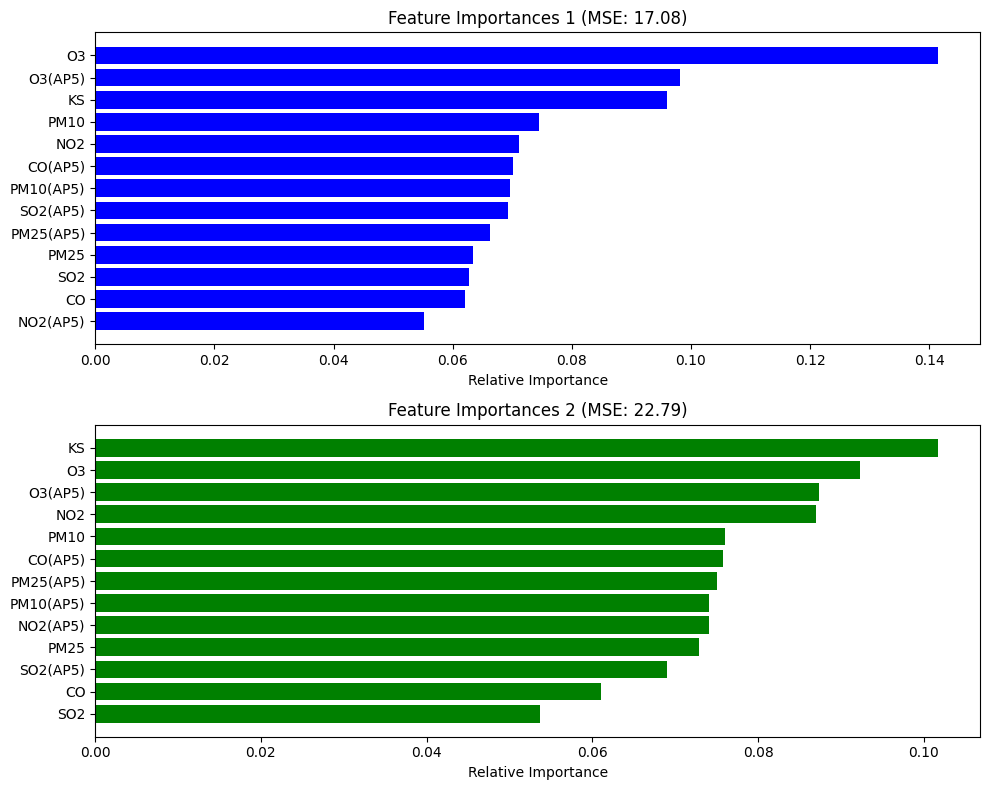

In [303]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')
dd = A['Day20'].median()
A1 = A[A['Day20']>=dd] #중앙값 보다 큰 경우 -> 미세먼지 영향 크지 않았을까?
A2 = A[A['Day20']<dd] #중앙값 보다 낮은 경우

#중앙값 보다 높은 경우
Y1 = A1['diff']
X1 = A1[A1.columns[3:18]].drop(['alpha', 'beta'], axis=1)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, Y_train1)

# 테스트 데이터에 대한 예측
Y_pred1 = model1.predict(X_test1)

# 모델 성능 평가 (MSE 사용)
accuracy1 = mean_squared_error(Y_test1, Y_pred1)

# Feature Importance 추출
importances1 = model1.feature_importances_

# Feature Importance를 시각화
features1 = X1.columns
indices1 = np.argsort(importances1)

#중앙값 보다 낮은 경우
Y2 = A2['diff']
X2 = A2[A2.columns[3:18]].drop(['alpha', 'beta'], axis=1)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, Y_train2)

# 테스트 데이터에 대한 예측
Y_pred2 = model2.predict(X_test2)

# 모델 성능 평가 (MSE 사용)
accuracy2 = mean_squared_error(Y_test2, Y_pred2)

# Feature Importance 추출
importances2 = model2.feature_importances_

# Feature Importance를 시각화
features2 = X2.columns
indices2 = np.argsort(importances2)
        
        
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# 첫 번째 그래프
axes[0].barh(range(len(indices1)), importances1[indices1], color='b', align='center')
axes[0].set_yticks(range(len(indices1)))
axes[0].set_yticklabels([features1[i] for i in indices1])
axes[0].set_xlabel('Relative Importance')
axes[0].set_title(f'Feature Importances 1 (MSE: {accuracy1:.2f})')

# 두 번째 그래프
axes[1].barh(range(len(indices2)), importances2[indices2], color='g', align='center')
axes[1].set_yticks(range(len(indices2)))
axes[1].set_yticklabels([features2[i] for i in indices2])
axes[1].set_xlabel('Relative Importance')
axes[1].set_title(f'Feature Importances 2 (MSE: {accuracy2:.2f})')

plt.tight_layout()
plt.show()

### 유의한 미세먼지 농도로만 분석을 한 경우

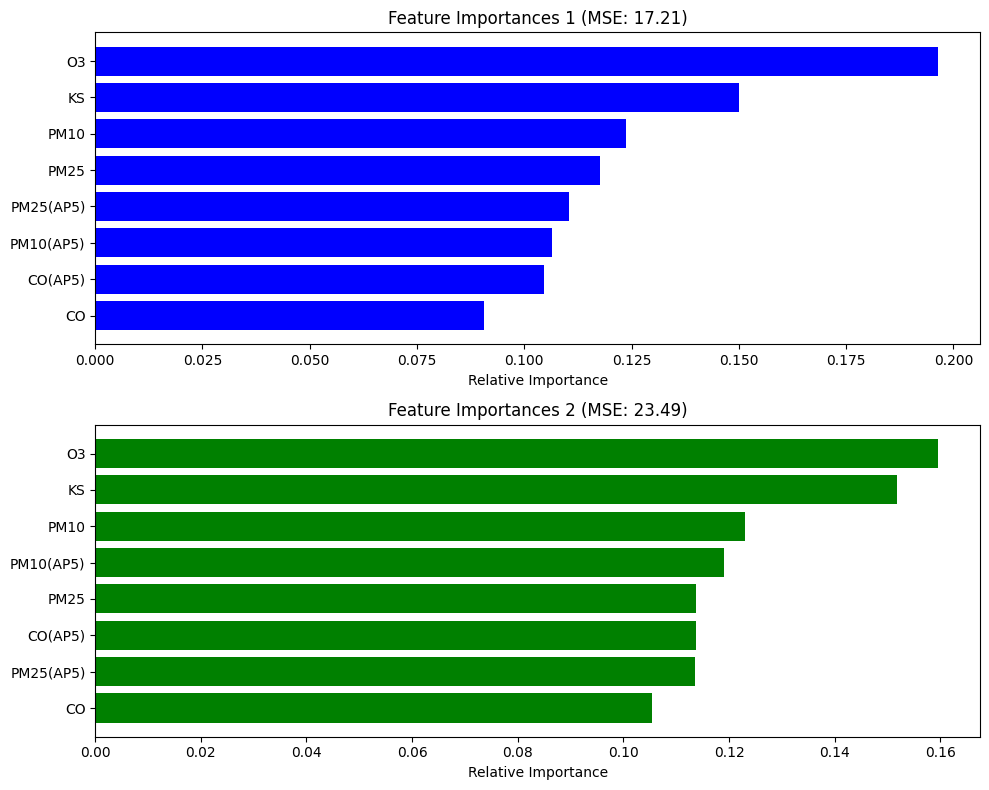

In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

A = pd.read_csv('proxya.csv', encoding='cp949')
dd = A['Day20'].median()
A1 = A[A['Day20']>=dd] #중앙값 보다 큰 경우 -> 미세먼지 영향 크지 않았을까?
A2 = A[A['Day20']<dd] #중앙값 보다 낮은 경우

#중앙값 보다 높은 경우
Y1 = A1['diff']
X1 = A1[['KS', 'O3', 'CO', 'CO(AP5)', 'PM10', 'PM10(AP5)', 'PM25', 'PM25(AP5)']]

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, Y_train1)

# 테스트 데이터에 대한 예측
Y_pred1 = model1.predict(X_test1)

# 모델 성능 평가 (MSE 사용)
accuracy1 = mean_squared_error(Y_test1, Y_pred1)

# Feature Importance 추출
importances1 = model1.feature_importances_

# Feature Importance를 시각화
features1 = X1.columns
indices1 = np.argsort(importances1)

#중앙값 보다 낮은 경우
Y2 = A2['diff']
X2 = A2[['KS', 'O3', 'CO', 'CO(AP5)', 'PM10', 'PM10(AP5)', 'PM25', 'PM25(AP5)']]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=44)

# 랜덤 포레스트 모델 생성 및 훈련
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, Y_train2)

# 테스트 데이터에 대한 예측
Y_pred2 = model2.predict(X_test2)

# 모델 성능 평가 (MSE 사용)
accuracy2 = mean_squared_error(Y_test2, Y_pred2)

# Feature Importance 추출
importances2 = model2.feature_importances_

# Feature Importance를 시각화
features2 = X2.columns
indices2 = np.argsort(importances2)
        
        
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# 첫 번째 그래프
axes[0].barh(range(len(indices1)), importances1[indices1], color='b', align='center')
axes[0].set_yticks(range(len(indices1)))
axes[0].set_yticklabels([features1[i] for i in indices1])
axes[0].set_xlabel('Relative Importance')
axes[0].set_title(f'Feature Importances 1 (MSE: {accuracy1:.2f})')

# 두 번째 그래프
axes[1].barh(range(len(indices2)), importances2[indices2], color='g', align='center')
axes[1].set_yticks(range(len(indices2)))
axes[1].set_yticklabels([features2[i] for i in indices2])
axes[1].set_xlabel('Relative Importance')
axes[1].set_title(f'Feature Importances 2 (MSE: {accuracy2:.2f})')

plt.tight_layout()
plt.show()

<oi>
    오존(O3) 가 코스피 지수보다 더 영향을 끼치고 있음을 확인 가능하며, 높은 양의 이상수익률을 후에 보이게 될 경우<br>
    더 MSE 등으로 정확도가 높다는 것을 확인 가능하다. 하지만, 여전히 코스피 지수 자체가 코스피 기업의 주가급락에 영향을 끼친다는 점은 변함이 없었으며 <br>
    이는 미세먼지로 인하여 주가급락이 일어났다긴 보단, 코스피 지수 등 여러 매크로 요인이 주가급락에 영향을 끼치며, 부가적으로 미세먼지 농도 등이 영향을 끼친다고 추론 가능한다.

## 결론

<oi>
    미세먼지의 농도의 경우 주가 급락이 발생 햇을 때, 농도가 음의 영향을 끼친다는 것을 확인 가능하다. <br>
    주가급락에 대해서 양,음의 엡실론을 통하여 어떠한 경우가 더 주가급락에 영향이 컸는 지를 파악 가능하다. <br>
    또한, 머신러닝 분류, 예측 등을 진행해본 결과 주가급락 발생 시, 이후 양의 이상수익률을 보일 지에 대하여, 그 날의 미세먼지 농도 등을 통하여 추정 가능하다. <br>
    하지만, 대체로 주가급락이 발생하지 않는 안정적인 코스피 기업의 특성으로 인하여 콧드피 지수 등 여러 매크로 요인이 주가급락에 영향을 끼치며 <br>
    그러한 주가급락이 발생한 경우 미세먼지 농도 등이 부가적인 영향을 끼쳤을 것으로 선후 관계를 파악 가능하다. <br>
    투자자들은 주가 급락이 발생하였을 때, 그 날의 미세먼지 농도 등을 통하여 이후 큰 양의 이상수익률을 보일 것 인지를 머신러닝 등을 통하여 예측, 분류 가능하므로 <br>
    이후 투자 계획 등에도 적용 가능할 것으로 기대 됨<br>